In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [5]:
print("Dataset Basic Information:")
print(titanic_df.info())

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print("\nMissing Values:")
print(titanic_df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [8]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [9]:
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [10]:
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


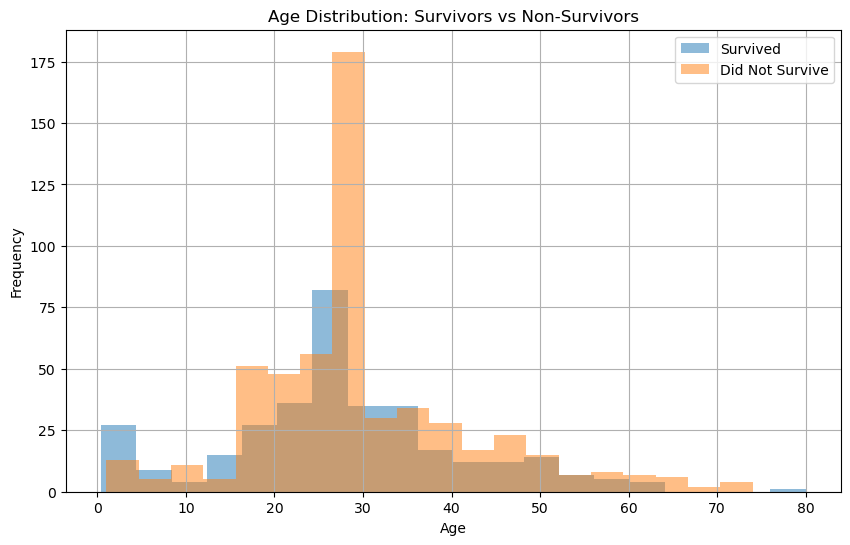

In [11]:
plt.figure(figsize=(10, 6))
titanic_df[titanic_df['Survived'] == 1]['Age'].hist(alpha=0.5, bins=20, label='Survived')
titanic_df[titanic_df['Survived'] == 0]['Age'].hist(alpha=0.5, bins=20, label='Did Not Survive')
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
print("\nSummary Statistics:")
summary_stats = titanic_df.describe()
print(summary_stats)


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
fare_analysis = titanic_df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack()
print("\nAverage Fare by Passenger Class and Survival:")
print(fare_analysis)


Average Fare by Passenger Class and Survival:
Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


In [14]:
correlation_matrix = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


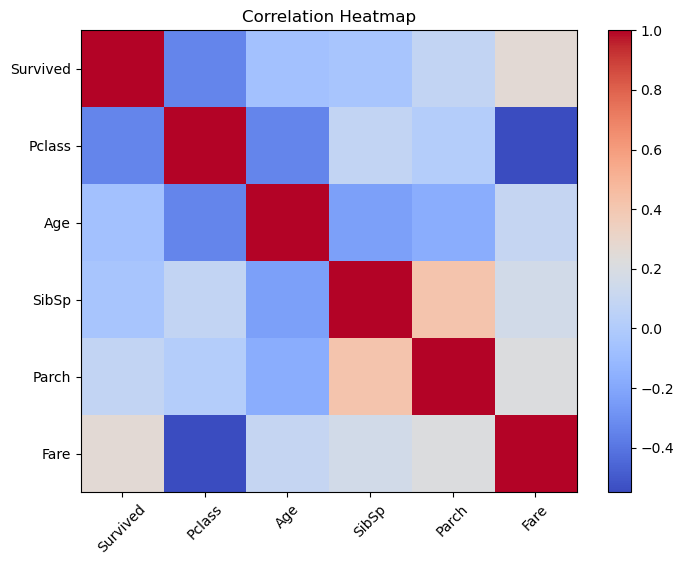

In [15]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()